In [1]:
from functools import partial
import pickle as pkl
import sys
import os

sys.path.insert(0, "../../../submodules/soepy")
sys.path.insert(0, "../../../library")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

from dev_library import get_criterion_function
from dev_library import plot_children_choices
from dev_library import plot_basics_choices
from dev_library import plot_basics_wages
from dev_library import df_alignment

## Observed data

In [2]:
fname = "../../../../data-exchange-sciebo/df-observed-data-weighted-subsample.pkl"
df_obs = pd.read_pickle(fname)

## Parameterization

In [6]:
params_start = pd.read_pickle("start_updated.soepy.pkl")
params_start = pd.read_pickle("steps.soepy.pkl").loc[254]
params_start
#params_start.query("fixed == False")

value    upper    lower  \
category          name                                                     
benefits_base                               200.000000  1000.00  100.000   
const_wage_eq     gamma_0s1                   2.200000     2.50    2.000   
                  gamma_0s2                   2.074695     2.50    2.000   
                  gamma_0s3                   2.200000     3.70    1.380   
delta                                         0.971317     0.99    0.900   
disutil_work      child_02_f                  2.004943     3.00   -0.000   
                  child_02_p                 -1.354728     0.00   -2.000   
                  child_35_f                  1.541779     2.00   -0.000   
                  child_35_p                 -1.162198     0.00   -2.000   
                  child_6orolder_f            1.593837     2.00   -0.000   
                  child_6orolder_p           -1.403251     0.00   -2.000   
                  no_kids_f_educ_high         0.639093     1.00   -0.000   
                  no_kids_f_educ_low          0.796898     1.00    0.000   
                  no_kids_f_educ_middle       0.185634     1.00   -0.000   
                  no_kids_p_educ_high        -0.482122     0.00   -1.000   
                  no_kids_p_educ_low         -0.562123     0.00   -1.000   
                  no_kids_p_educ_middle      -0.303361     0.00   -1.000   
                  yes_kids_f_educ_high        0.684388     2.00   -0.000   
                  yes_kids_f_educ_low         1.107766     1.50    0.500   
                  yes_kids_f_educ_middle      0.882570     1.50    0.200   
                  yes_kids_p_educ_high       -0.535057     0.00   -1.000   
                  yes_kids_p_educ_low        -0.802622     0.00   -1.000   
                  yes_kids_p_educ_middle     -0.657290     0.00   -1.000   
exp_accm          g_s1                        0.083693     0.50    0.001   
                  g_s2                        0.205770     0.50    0.001   
                  g_s3                        0.226319     0.50    0.001   
exp_accm_expected g_bar_s1                    0.570000     0.90    0.100   
                  g_bar_s2                    0.535000     0.90    0.100   
                  g_bar_s3                    0.625000     0.90    0.100   
exp_deprec        delta_s1                    0.020000     0.20    0.001   
                  delta_s2                    0.020000     0.20    0.001   
                  delta_s3                    0.020000     0.20    0.001   
exp_returns       gamma_1s1                   0.125000     0.20    0.050   
                  gamma_1s2                   0.262082     0.30    0.100   
                  gamma_1s3                   0.300000     0.50    0.001   
hetrg_unobs       theta_f1                   -0.861178    -0.10   -3.000   
                  theta_p1                   -0.409543    -0.10   -3.000   
mu                                           -0.392753    -0.99   -0.010   
sd_wage_shock     sigma_1                     0.336740     1.00    0.001   
                  sigma_2                     0.363327     1.00    0.001   
shares            share_1                     0.844696     0.90    0.100   
fval              fval                    52371.612296      NaN      NaN   

                                          fixed  
category          name                           
benefits_base                              True  
const_wage_eq     gamma_0s1                True  
                  gamma_0s2               False  
                  gamma_0s3                True  
delta                                      True  
disutil_work      child_02_f               True  
                  child_02_p               True  
                  child_35_f               True  
                  child_35_p               True  
                  child_6orolder_f         True  
                  child_6orolder_p         True  
                  no_kids_f_educ_high      True  
    

## Simulation

In [7]:
df_sim = soepy.simulate(params_start, "resources/model_spec_init.yml")
df_sim = df_alignment(df_sim)
df_sim.to_pickle("df_sim.soepy.pkl")

## Plotting

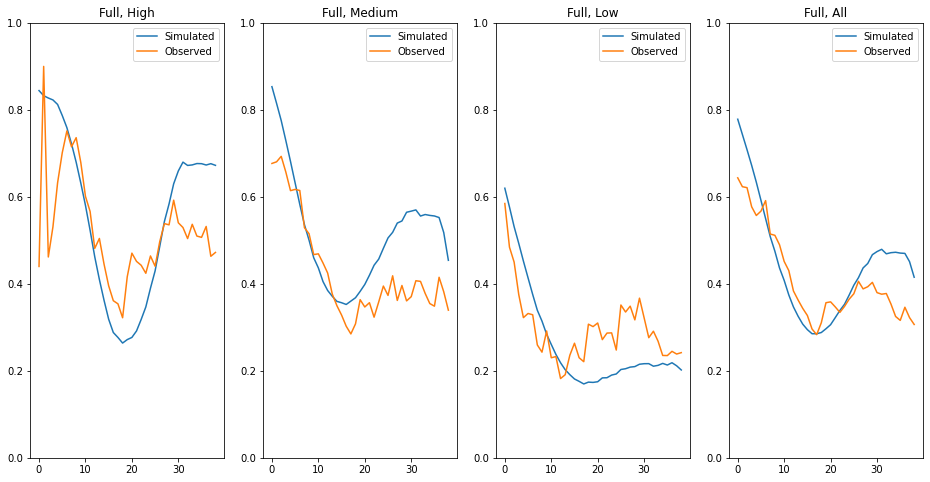

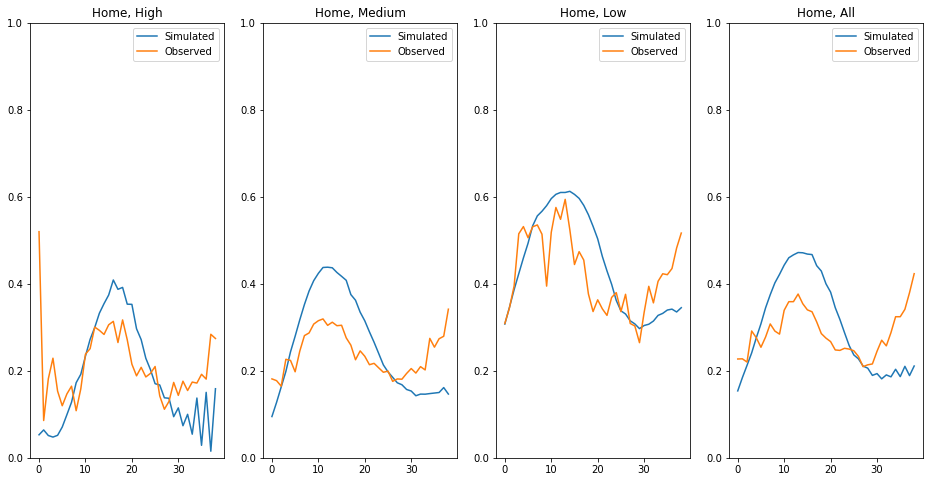

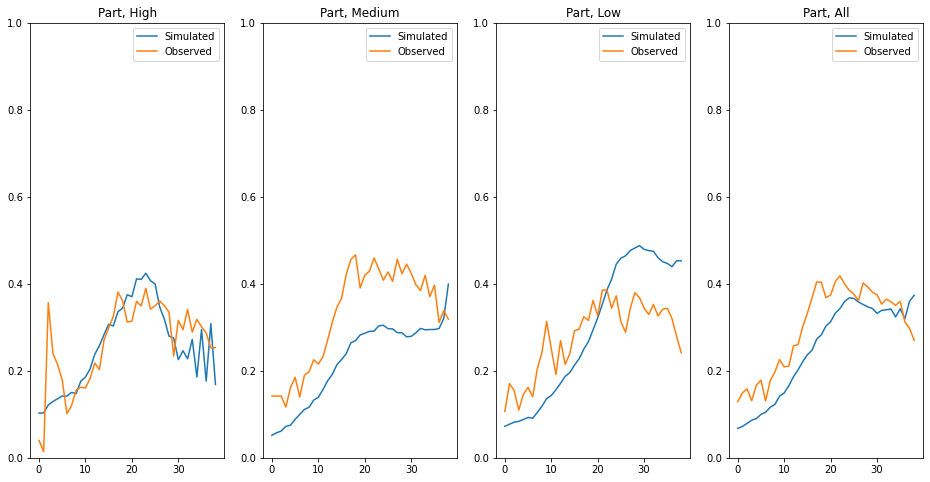

In [8]:
plot_basics_choices(df_sim=df_sim, df_obs=df_obs)

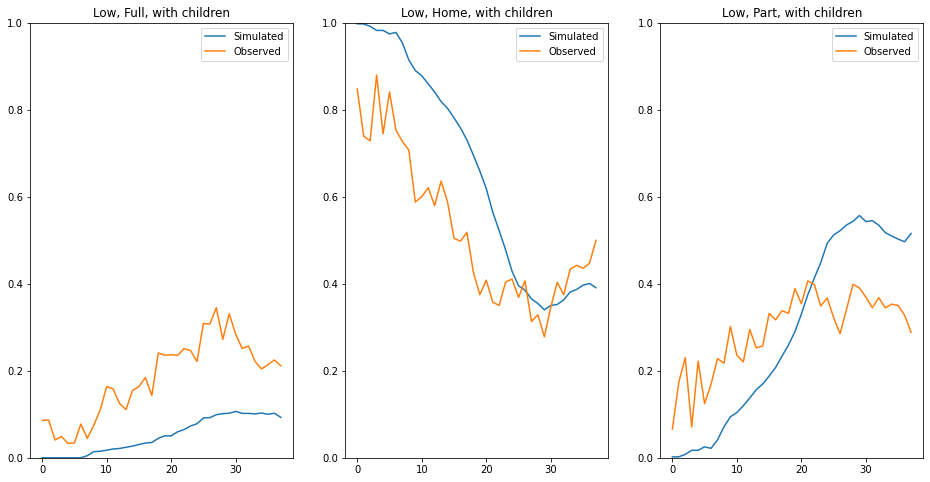

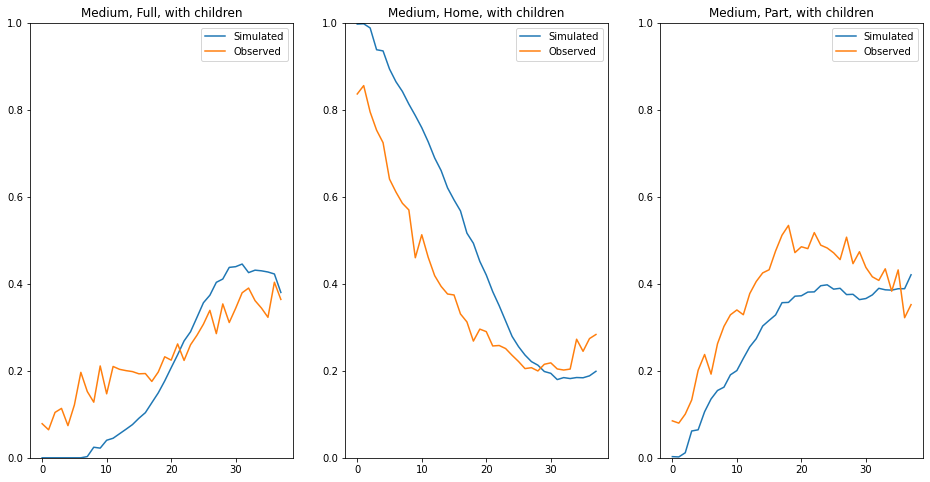

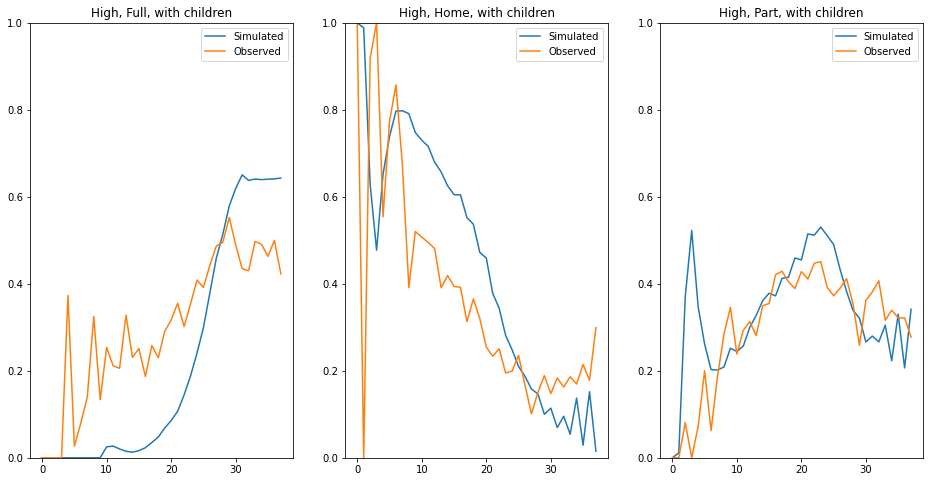

In [9]:
plot_children_choices(df_sim=df_sim, df_obs=df_obs)

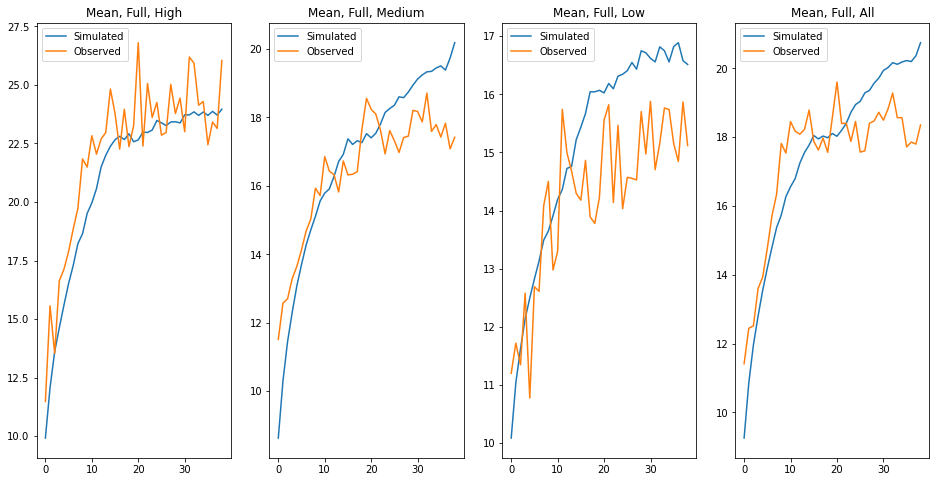

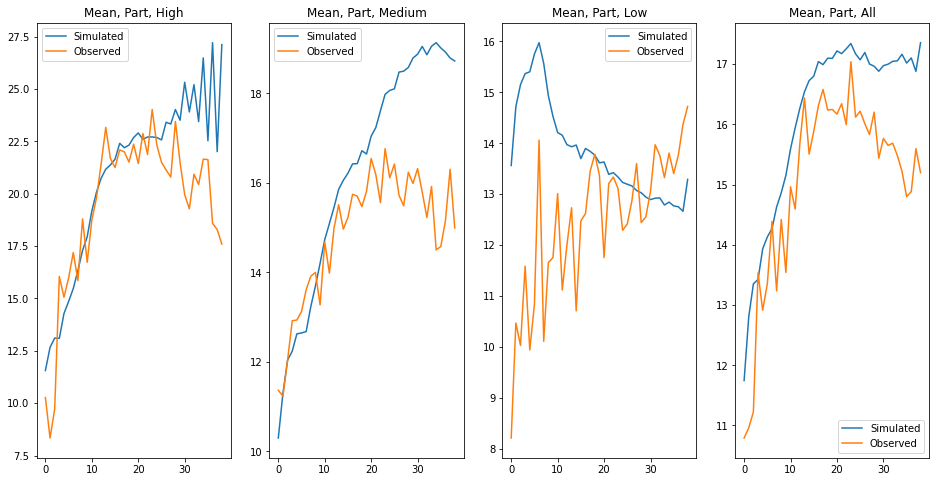

In [10]:
plot_basics_wages(df_sim=df_sim, df_obs=df_obs)